In [1]:
from pycaret.classification import * 

In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from tqdm import tqdm
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from IPython.display import set_matplotlib_formats

sns.set(style='white', context='notebook', palette='deep')
line_color = ['#FFBF00','#FF7F50','#DE3163','#9FE2BF','#40E0D0','#6495ED','#117A65','#2471A3','#CCCCFF','#8E44AD','#CD5C5C' ,'#F08080','#FA8072' ,'#E9967A' ,'#FFA07A']
plt.style.use('fivethirtyeight')
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])
%matplotlib inline

['Malgun Gothic']


# 데이터 불러오기

In [3]:
data=pd.read_csv('산불_이동평균+윈도우.csv',encoding='cp949')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10021 non-null  object 
 1   발생지역             10021 non-null  object 
 2   주소               10021 non-null  object 
 3   경도               10021 non-null  float64
 4   위도               10021 non-null  float64
 5   피해면적             10021 non-null  float64
 6   상대습도             9747 non-null   float64
 7   상대습도_1days_prev  9744 non-null   float64
 8   상대습도_2days_prev  9744 non-null   float64
 9   상대습도_3days_prev  9743 non-null   float64
 10  상대습도_4days_prev  9741 non-null   float64
 11  실효습도             9741 non-null   float64
 12  지점_asos          9747 non-null   float64
 13  거리_asos          9747 non-null   float64
 14  기온               10020 non-null  float64
 15  강수량              10020 non-null  float64
 16  풍속               9995 non-null   float64
 17  기온_1days_pre

In [5]:
data['발생지역'].unique()

array(['제주', '경북', '강원', '부산', '경남', '전남', '대전', '광주', '전북', '서울', '대구',
       '인천', '충북', '울산', '충남', '경기', '세종'], dtype=object)

In [6]:
data.head()

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,지점_asos,거리_asos,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.30,74.9,NaN,NaN,NaN,NaN,NaN,187.0,10.158655,3.9,0.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.516786
1,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.50,41.8,45.5,48.6,48.6,NaN,NaN,281.0,5.305726,-3.8,0.0,1.7,-2.7,2.2,-2.4,NaN,0.0,0.0,0.0,NaN,840.0,10.195594
2,2001-01-05,강원,강원도 강릉시 성산면 어흘리,128.780562,37.710108,0.06,45.0,40.1,48.3,61.8,63.9,39.983037,100.0,6.594166,-3.0,0.0,2.7,-4.8,-4.4,0.2,-0.1,0.0,0.0,0.0,0.0,524.0,15.220659
3,2001-01-03,강원,강원도 홍천군 홍천읍 상오안리,127.814492,37.640889,0.20,44.5,58.9,68.3,NaN,NaN,NaN,212.0,7.497593,-8.1,0.0,1.8,-4.8,-7.3,NaN,NaN,0.5,0.0,NaN,NaN,558.0,11.207163
4,2001-01-04,부산,부산광역시 사하구 다대동,128.966599,35.052936,0.05,35.4,37.9,44.1,29.8,NaN,NaN,159.0,8.279435,-6.1,0.0,8.5,-4.2,0.8,-2.4,NaN,0.0,0.0,0.0,NaN,160.0,7.929285


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10021 non-null  object 
 1   발생지역             10021 non-null  object 
 2   주소               10021 non-null  object 
 3   경도               10021 non-null  float64
 4   위도               10021 non-null  float64
 5   피해면적             10021 non-null  float64
 6   상대습도             9747 non-null   float64
 7   상대습도_1days_prev  9744 non-null   float64
 8   상대습도_2days_prev  9744 non-null   float64
 9   상대습도_3days_prev  9743 non-null   float64
 10  상대습도_4days_prev  9741 non-null   float64
 11  실효습도             9741 non-null   float64
 12  지점_asos          9747 non-null   float64
 13  거리_asos          9747 non-null   float64
 14  기온               10020 non-null  float64
 15  강수량              10020 non-null  float64
 16  풍속               9995 non-null   float64
 17  기온_1days_pre

In [8]:
data['날짜']=pd.to_datetime(data['날짜'])
data[['계절']]=np.nan

In [9]:
for i in range(2001, 2023):
    data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절']=data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절'].fillna('봄')
    data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절']=data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절'].fillna('가을')
data[['계절']]=data[['계절']].fillna('그외')

In [10]:
import datetime
data['month'] = data['날짜'].dt.strftime('%m')

In [11]:
data.head()

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,지점_asos,거리_asos,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws,계절,month
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.30,74.9,NaN,NaN,NaN,NaN,NaN,187.0,10.158655,3.9,0.0,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.516786,그외,01
1,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.50,41.8,45.5,48.6,48.6,NaN,NaN,281.0,5.305726,-3.8,0.0,1.7,-2.7,2.2,-2.4,NaN,0.0,0.0,0.0,NaN,840.0,10.195594,그외,01
2,2001-01-05,강원,강원도 강릉시 성산면 어흘리,128.780562,37.710108,0.06,45.0,40.1,48.3,61.8,63.9,39.983037,100.0,6.594166,-3.0,0.0,2.7,-4.8,-4.4,0.2,-0.1,0.0,0.0,0.0,0.0,524.0,15.220659,그외,01
3,2001-01-03,강원,강원도 홍천군 홍천읍 상오안리,127.814492,37.640889,0.20,44.5,58.9,68.3,NaN,NaN,NaN,212.0,7.497593,-8.1,0.0,1.8,-4.8,-7.3,NaN,NaN,0.5,0.0,NaN,NaN,558.0,11.207163,그외,01
4,2001-01-04,부산,부산광역시 사하구 다대동,128.966599,35.052936,0.05,35.4,37.9,44.1,29.8,NaN,NaN,159.0,8.279435,-6.1,0.0,8.5,-4.2,0.8,-2.4,NaN,0.0,0.0,0.0,NaN,160.0,7.929285,그외,01


**발생지역별 월 평균을 구해서 결측값을 채우기위해 groupby 사용**

In [12]:
data.groupby(['발생지역','month']).mean()
data.groupby(['발생지역','month']).mean()[['상대습도']]

경도         위도       피해면적       상대습도  상대습도_1days_prev  \
발생지역 month                                                                 
강원   01     128.388287  37.711510   2.226344  48.757609        47.407609   
     02     128.343523  37.685139   3.516762  47.983838        47.254545   
     03     128.192121  37.720793  28.580145  43.298980        47.123469   
     04     128.193720  37.760542  17.183859  45.252843        47.990301   
     05     128.268294  37.706939   5.807251  49.420202        52.364646   
     06     128.216544  37.730082   0.221132  56.981726        56.968000   
     07     128.053495  37.417690   0.243750  64.085714        65.942857   
     08     128.271688  37.571385   0.816000  63.828571        66.878571   
     09     127.914027  37.675216   0.065556  65.612500        69.200000   
     10     128.254271  37.656200   0.244490  66.565957        67.138298   
     11     128.284720  37.761159   0.905441  54.260294        55.463235   
     12     128.433196  37.702988   1.962833  49.933333        53.963333   
경기   01     127.122660  37.564800   0.231687  56.559756        57.592683   
     02     127.149711  37.511816   0.256641  50.444615        53.986923   
     03     127.175761  37.523764   0.476866  49.224168        51.506977   
     04     127.194472  37.561398   0.512146  47.896200        50.999287   
     05     127.184536  37.583917   0.294224  51.163063        52.345045   
     06     127.126373  37.543003   0.241622  53.543662        54.550704   
     07     127.085151  37.545512   0.097273  65.572727        67.281818   
     08     127.025142  37.330070   0.143333  58.287500        59.537500   
     09     127.095535  37.491835   0.085882  60.243750        64.731250   
     10     127.190790  37.538643   0.139231  65.900000        65.219231   
     11     127.235899  37.638558   0.420164  60.624590        64.091803   
     12     127.153148  37.467669   0.081250  53.548387        61.006452   
경남   01     128.343543  35.302687   0.263858  46.435714        47.110317   
     02     128.359686  35.282804   5.707333  45.534637        47.356425   
     03     128.283047  35.336350   0.612871  48.194737        49.723923   
     04     128.289490  35.345239   3.171346  48.268527        50.424541   
     05     128.310858  35.405181   9.411528  54.479167        54.515337   
     06     128.317459  35.402881   0.170000  59.869388        61.579592   
     07     128.642006  35.310268   0.433333  65.900000        72.066667   
     08     128.261370  35.329496   0.027500  68.187500        69.412500   
     09     128.241665  35.341832   0.070909  68.190909        68.172727   
     10     128.410755  35.297617   0.175306  61.863265        59.197959   
     11     128.237927  35.331913   0.180429  56.740000        61.818571   
     12     128.343006  35.254251   0.238765  50.419753        52.376543   
경북   01     128.877306  36.335282   0.843918  46.093413        47.485030   
     02     128.788893  36.316661   4.183612  45.765022        47.104484   
     03     128.724965  36.385112  42.777588  44.270588        46.605627   
     04     128.763052  36.380218  10.038525  44.528313        46.472892   
     05     128.850322  36.379070   3.457238  51.431818        53.643750   
     06     128.799478  36.326653   0.539576  58.038793        56.627586   
     07     128.913478  36.359729   0.186667  69.480000        73.386667   
     08     128.852875  36.258384   2.051176  64.941176        65.200000   
     09     128.624123  36.218064   0.158095  66.228571        69.047619   
     10     128.688459  36.362177   0.162979  65.282609        66.678261   
     11     128.877201  36.295757   0.496182  57.325472        58.219811   
     12     128.849726  36.191757   0.388750  47.012500        46.887500   
광주   01     126.898276  35.105923   0.354000  57.280000        59.820000   
     02     126.851547  35.153680   0.320952  50.700000        51.004762   
     03     126.863901  35.152636   0.462941  49.572549        52.46

상대습도
발생지역 month           
강원   01     48.757609
     02     47.983838
     03     43.298980
     04     45.252843
     05     49.420202
     06     56.981726
     07     64.085714
     08     63.828571
     09     65.612500
     10     66.565957
     11     54.260294
     12     49.933333
경기   01     56.559756
     02     50.444615
     03     49.224168
     04     47.896200
     05     51.163063
     06     53.543662
     07     65.572727
     08     58.287500
     09     60.243750
     10     65.900000
     11     60.624590
     12     53.548387
경남   01     46.435714
     02     45.534637
     03     48.194737
     04     48.268527
     05     54.479167
     06     59.869388
     07     65.900000
     08     68.187500
     09     68.190909
     10     61.863265
     11     56.740000
     12     50.419753
경북   01     46.093413
     02     45.765022
     03     44.270588
     04     44.528313
     05     51.431818
     06     58.038793
     07     69.480000
     08     64.941176
     09     66.228571
     10     65.282609
     11     57.325472
     12     47.012500
광주   01     57.280000
     02     50.700000
     03     49.572549
     04     47.878571
     05     47.857143
     06     58.180000
     10     54.600000
     11     54.000000
     12     67.050000
대구   01     46.830769
     02     44.348148
     03     42.829545
     04     40.378788
     05     44.060000
     06     57.065284
     07     76.000000
     08     63.200000
     10     61.300000
     11     50.366667
     12     47.050000
대전   01     58.566667
     02     51.344000
     03     48.768056
     04     46.300000
     05     47.488235
     06     53.622222
     09     58.466667
     10     58.100000
     11     58.827273
     12     62.857143
부산   01     37.964706
     02     38.201333
     03     45.713462
     04     48.683607
     05     58.740000
     06     58.809091
     08     67.466667
     09     65.300000
     10     56.027273
     11     47.100000
     12     41.045000
서울   01     47.438462
     02     47.227586
     03     45.518812
     04     44.624000
     05     53.607692
     06     51.260870
     07     74.300000
     09     65.800000
     10     48.514286
     11     51.921053
     12     45.411765
세종   01     56.900000
     02     45.500000
     03     52.283333
     04     49.650000
     05     50.950000
     06     57.433333
     07     50.500000
울산   01     39.750000
     02     39.850000
     03     42.993220
     04     49.111111
     05     55.845455
     06     60.760000
     08     73.600000
     09     68.400000
     10     52.600000
     11     46.952941
     12     40.300000
인천   01     54.163636
     02     52.964706
     03     58.560000
     04     55.053398
     05     63.634783
     06     71.157143
     07     61.900000
     08     85.000000
     09     65.970000
     10     64.312500
     11     54.741667
     12     51.233333
전남   01     56.331148
     02     54.333113
     03     55.313357
     04     53.933333
     05     53.886957
     06     69.688462
     07     76.900000
     08     74.044444
     09     65.720000
     10     66.240000
     11     59.482143
     12     59.687500
전북   01     60.978571
     02     57.859322
     03     53.550000
     04     52.138462
     05     53.978689
     06     61.691304
     07     61.500000
     08     63.514286
     09     65.462500
     10     68.304545
     11     63.140000
     12     58.488167
제주   01     74.900000
     02     59.800000
     03     45.450000
     04     50.950000
     11     46.400000
충남   01     63.445455
     02     54.246667
     03     55.889091
     04     51.862887
     05     57.278378
     06     64.608824
     07     61.366667
     08     68.940000
     09     63.278947
     10     69.616667
     11     64.000000
     12     67.530769
충북   01     50.673684
     02     52.511475
     03     46.883125
     04     44.688830
     05     51.170690
     06     51.451429
     07     66.983333
     08     64.520000
     09     64.542857
     10     6

In [13]:
data.columns

Index(['날짜', '발생지역', '주소', '경도', '위도', '피해면적', '상대습도', '상대습도_1days_prev',
       '상대습도_2days_prev', '상대습도_3days_prev', '상대습도_4days_prev', '실효습도',
       '지점_asos', '거리_asos', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '지점_aws',
       '거리_aws', '계절', 'month'],
      dtype='object')

In [14]:
cols=data.columns.drop(['날짜', '발생지역', '주소', '경도', '위도', '피해면적', '지점_aws',
       '거리_aws', '계절', 'month','지점_asos', '거리_asos',])
cols

Index(['상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev'],
      dtype='object')

In [15]:
cnt=0
for i in tqdm(range(len(cols))):
    for j in range(len(data)):
        if(np.isnan(data[[cols[i]]].loc[j].values[0])):  # 해당 컬럼의 값이 결측값이면 
            loc=data.loc[j]['발생지역']
            month=data.loc[j]['month']
            tmp=data.groupby(['발생지역','month']).mean()[[cols[i]]].loc[loc].loc[month].values[0]
            print(loc,month)
            print(tmp)
            cnt=cnt+1
            data[cols[i]].loc[j]=tmp

            print(data[[cols[i]]].loc[j])
print(cnt)

  0%|          | 0/17 [00:00<?, ?it/s]

전남 02
54.33311258278145
상대습도    54.333113
Name: 10, dtype: float64
경북 03
44.27058823529411
상대습도    44.270588
Name: 144, dtype: float64
경기 03
49.22416750592498
상대습도    49.224168
Name: 224, dtype: float64
전남 03
55.31335740072202
상대습도    55.313357
Name: 246, dtype: float64
전남 04
53.93333333333334
상대습도    53.933333
Name: 324, dtype: float64
강원 04
45.25284280936455
상대습도    45.252843
Name: 335, dtype: float64
경북 04
44.528313253012044
상대습도    44.528313
Name: 338, dtype: float64
충남 04
51.86288659793814
상대습도    51.862887
Name: 359, dtype: float64
강원 04
45.25284280936455
상대습도    45.252843
Name: 432, dtype: float64
충남 04
51.86288659793815
상대습도    51.862887
Name: 466, dtype: float64
충북 04
44.68882978723404
상대습도    44.68883
Name: 470, dtype: float64
인천 04
55.05339805825243
상대습도    55.053398
Name: 522, dtype: float64
전남 04
53.93333333333333
상대습도    53.933333
Name: 537, dtype: float64
강원 05
49.42020202020203
상대습도    49.420202
Name: 603, dtype: float64
강원 06
56.98172574160148
상대습도    56.981726
Name: 6

전남 03
55.31335740072202
상대습도    55.313357
Name: 3667, dtype: float64
전남 03
55.31335740072202
상대습도    55.313357
Name: 3805, dtype: float64
전남 03
55.313357400722026
상대습도    55.313357
Name: 3838, dtype: float64
인천 04
55.05339805825243
상대습도    55.053398
Name: 3849, dtype: float64
강원 05
49.42020202020202
상대습도    49.420202
Name: 3858, dtype: float64
전남 04
53.93333333333333
상대습도    53.933333
Name: 3907, dtype: float64
경북 04
44.52831325301205
상대습도    44.528313
Name: 3937, dtype: float64
경북 05
51.43181818181818
상대습도    51.431818
Name: 3952, dtype: float64
강원 05
49.42020202020202
상대습도    49.420202
Name: 3977, dtype: float64
전남 04
53.93333333333334
상대습도    53.933333
Name: 4028, dtype: float64
강원 02
47.98383838383839
상대습도    47.983838
Name: 4154, dtype: float64
강원 02
47.98383838383838
상대습도    47.983838
Name: 4165, dtype: float64
충북 04
44.68882978723404
상대습도    44.68883
Name: 4244, dtype: float64
충북 04
44.68882978723404
상대습도    44.68883
Name: 4350, dtype: float64
경북 05
51.43181818181818
상대습도    51.

전남 02
54.33311258278145
상대습도    54.333113
Name: 9479, dtype: float64
충남 02
54.24666666666667
상대습도    54.246667
Name: 9545, dtype: float64
강원 02
47.98383838383839
상대습도    47.983838
Name: 9600, dtype: float64
강원 03
43.29897959183673
상대습도    43.29898
Name: 9672, dtype: float64
충남 04
51.862886597938136
상대습도    51.862887
Name: 9688, dtype: float64
경북 04
44.52831325301205
상대습도    44.528313
Name: 9718, dtype: float64
경기 04
47.89619952494062
상대습도    47.8962
Name: 9774, dtype: float64
전북 05
53.97868852459016
상대습도    53.978689
Name: 9789, dtype: float64
경북 05
51.43181818181818
상대습도    51.431818
Name: 9792, dtype: float64
강원 04
45.252842809364545
상대습도    45.252843
Name: 9830, dtype: float64
전남 11
59.482142857142854
상대습도    59.482143
Name: 9973, dtype: float64
전남 09
65.72
상대습도    65.72
Name: 9980, dtype: float64
전남 10
66.24
상대습도    66.24
Name: 10001, dtype: float64
제주 01
nan
상대습도_1days_prev   NaN
Name: 0, dtype: float64
부산 01
39.110061266761974
상대습도_1days_prev    39.110061
Name: 5, dtype: float64


전북 03
55.926874999999995
상대습도_1days_prev    55.926875
Name: 2776, dtype: float64
전남 10
66.785
상대습도_1days_prev    66.785
Name: 2822, dtype: float64
충남 10
65.00833333333334
상대습도_1days_prev    65.008333
Name: 2857, dtype: float64
충남 04
56.01769409717821
상대습도_1days_prev    56.017694
Name: 2868, dtype: float64
충남 09
65.25263157894737
상대습도_1days_prev    65.252632
Name: 2870, dtype: float64
전남 11
64.35
상대습도_1days_prev    64.35
Name: 2893, dtype: float64
전남 11
64.35
상대습도_1days_prev    64.35
Name: 2910, dtype: float64
강원 02
47.25454545454545
상대습도_1days_prev    47.254545
Name: 2949, dtype: float64
전남 10
66.785
상대습도_1days_prev    66.785
Name: 2959, dtype: float64
전남 01
57.003278688524595
상대습도_1days_prev    57.003279
Name: 2962, dtype: float64
경북 01
47.48502994011976
상대습도_1days_prev    47.48503
Name: 2981, dtype: float64
전남 02
56.31059602649006
상대습도_1days_prev    56.310596
Name: 3017, dtype: float64
충남 02
57.337777777777774
상대습도_1days_prev    57.337778
Name: 3071, dtype: float64
전남 02
56.310596026

경기 06
54.55070422535211
상대습도_1days_prev    54.550704
Name: 6180, dtype: float64
강원 05
52.36464646464647
상대습도_1days_prev    52.364646
Name: 6204, dtype: float64
경기 09
64.73125
상대습도_1days_prev    64.73125
Name: 6244, dtype: float64
전남 08
71.07777777777778
상대습도_1days_prev    71.077778
Name: 6260, dtype: float64
전북 10
73.09545454545454
상대습도_1days_prev    73.095455
Name: 6283, dtype: float64
충남 10
65.00833333333334
상대습도_1days_prev    65.008333
Name: 6302, dtype: float64
경북 01
47.48502994011976
상대습도_1days_prev    47.48503
Name: 6343, dtype: float64
경북 10
66.67826086956521
상대습도_1days_prev    66.678261
Name: 6369, dtype: float64
강원 03
47.1234693877551
상대습도_1days_prev    47.123469
Name: 6416, dtype: float64
전북 03
55.926875
상대습도_1days_prev    55.926875
Name: 6476, dtype: float64
경기 03
51.506976851903914
상대습도_1days_prev    51.506977
Name: 6489, dtype: float64
강원 04
47.990301003344484
상대습도_1days_prev    47.990301
Name: 6648, dtype: float64
인천 09
70.28999999999999
상대습도_1days_prev    70.29
Name: 670

전남 03
59.12563176895306
상대습도_2days_prev    59.125632
Name: 1012, dtype: float64
강원 03
50.59591836734693
상대습도_2days_prev    50.595918
Name: 1026, dtype: float64
전남 04
58.779731568290906
상대습도_2days_prev    58.779732
Name: 1088, dtype: float64
인천 03
61.18571428571428
상대습도_2days_prev    61.185714
Name: 1090, dtype: float64
강원 03
50.59591836734694
상대습도_2days_prev    50.595918
Name: 1100, dtype: float64
충남 04
58.15359775545216
상대습도_2days_prev    58.153598
Name: 1139, dtype: float64
충남 04
58.15359775545217
상대습도_2days_prev    58.153598
Name: 1222, dtype: float64
경북 04
49.760240963855416
상대습도_2days_prev    49.760241
Name: 1237, dtype: float64
전남 06
74.67307692307692
상대습도_2days_prev    74.673077
Name: 1262, dtype: float64
인천 10
64.375
상대습도_2days_prev    64.375
Name: 1325, dtype: float64
경북 03
48.781841432225065
상대습도_2days_prev    48.781841
Name: 1389, dtype: float64
충남 04
58.15359775545217
상대습도_2days_prev    58.153598
Name: 1443, dtype: float64
충남 04
58.15359775545217
상대습도_2days_prev    58.15359

강원 10
67.13404255319149
상대습도_2days_prev    67.134043
Name: 4440, dtype: float64
강원 10
67.13404255319149
상대습도_2days_prev    67.134043
Name: 4460, dtype: float64
충북 05
50.74310344827587
상대습도_2days_prev    50.743103
Name: 4466, dtype: float64
전북 11
63.61333333333333
상대습도_2days_prev    63.613333
Name: 4491, dtype: float64
인천 11
56.85833333333333
상대습도_2days_prev    56.858333
Name: 4541, dtype: float64
전남 02
58.44900662251655
상대습도_2days_prev    58.449007
Name: 4576, dtype: float64
전남 11
63.42142857142857
상대습도_2days_prev    63.421429
Name: 4585, dtype: float64
전남 02
58.449006622516556
상대습도_2days_prev    58.449007
Name: 4610, dtype: float64
전남 02
58.449006622516556
상대습도_2days_prev    58.449007
Name: 4636, dtype: float64
충북 02
53.48688524590164
상대습도_2days_prev    53.486885
Name: 4645, dtype: float64
인천 04
60.74563106796116
상대습도_2days_prev    60.745631
Name: 4657, dtype: float64
충남 04
58.15359775545217
상대습도_2days_prev    58.153598
Name: 4672, dtype: float64
전남 01
59.05245901639344
상대습도_2days_pre

전북 03
58.685624999999995
상대습도_2days_prev    58.685625
Name: 9236, dtype: float64
강원 04
50.275585284280936
상대습도_2days_prev    50.275585
Name: 9245, dtype: float64
충남 08
75.36
상대습도_2days_prev    75.36
Name: 9341, dtype: float64
경북 01
47.95688622754491
상대습도_2days_prev    47.956886
Name: 9380, dtype: float64
전남 02
58.449006622516556
상대습도_2days_prev    58.449007
Name: 9479, dtype: float64
충남 02
59.74222222222222
상대습도_2days_prev    59.742222
Name: 9545, dtype: float64
강원 02
48.92626262626263
상대습도_2days_prev    48.926263
Name: 9600, dtype: float64
강원 03
50.59591836734694
상대습도_2days_prev    50.595918
Name: 9672, dtype: float64
충남 04
58.15359775545217
상대습도_2days_prev    58.153598
Name: 9688, dtype: float64
경북 04
49.76024096385542
상대습도_2days_prev    49.760241
Name: 9718, dtype: float64
경기 04
53.95154394299288
상대습도_2days_prev    53.951544
Name: 9774, dtype: float64
전북 05
58.62459016393443
상대습도_2days_prev    58.62459
Name: 9789, dtype: float64
경북 05
55.111363636363635
상대습도_2days_prev    55.111364


전북 03
60.03
상대습도_3days_prev    60.03
Name: 2776, dtype: float64
전남 10
69.47
상대습도_3days_prev    69.47
Name: 2822, dtype: float64
충남 10
71.58333333333333
상대습도_3days_prev    71.583333
Name: 2857, dtype: float64
충남 04
59.290195693596495
상대습도_3days_prev    59.290196
Name: 2868, dtype: float64
충남 09
73.93157894736842
상대습도_3days_prev    73.931579
Name: 2870, dtype: float64
전남 11
63.482142857142854
상대습도_3days_prev    63.482143
Name: 2893, dtype: float64
전남 11
63.48214285714286
상대습도_3days_prev    63.482143
Name: 2910, dtype: float64
강원 02
48.44343434343435
상대습도_3days_prev    48.443434
Name: 2949, dtype: float64
전남 10
69.47
상대습도_3days_prev    69.47
Name: 2959, dtype: float64
전남 01
57.41475409836065
상대습도_3days_prev    57.414754
Name: 2962, dtype: float64
경북 01
48.2814371257485
상대습도_3days_prev    48.281437
Name: 2981, dtype: float64
전남 02
59.60331125827815
상대습도_3days_prev    59.603311
Name: 3017, dtype: float64
충남 02
60.59555555555555
상대습도_3days_prev    60.595556
Name: 3071, dtype: float64
전남 02
5

강원 05
55.891906148053394
상대습도_3days_prev    55.891906
Name: 6204, dtype: float64
경기 09
67.9375
상대습도_3days_prev    67.9375
Name: 6244, dtype: float64
전남 08
75.21111111111111
상대습도_3days_prev    75.211111
Name: 6260, dtype: float64
전북 10
73.87272727272727
상대습도_3days_prev    73.872727
Name: 6283, dtype: float64
충남 10
71.58333333333333
상대습도_3days_prev    71.583333
Name: 6302, dtype: float64
경북 01
48.2814371257485
상대습도_3days_prev    48.281437
Name: 6343, dtype: float64
경북 10
70.3586956521739
상대습도_3days_prev    70.358696
Name: 6369, dtype: float64
강원 03
50.55459183673469
상대습도_3days_prev    50.554592
Name: 6416, dtype: float64
전북 03
60.029999999999994
상대습도_3days_prev    60.03
Name: 6476, dtype: float64
경기 03
55.79772727272727
상대습도_3days_prev    55.797727
Name: 6489, dtype: float64
강원 04
51.287625418060195
상대습도_3days_prev    51.287625
Name: 6648, dtype: float64
인천 09
73.5
상대습도_3days_prev    73.5
Name: 6702, dtype: float64
인천 11
59.125
상대습도_3days_prev    59.125
Name: 6709, dtype: float64
경기 02
5

충남 03
62.835454545454546
상대습도_4days_prev    62.835455
Name: 1006, dtype: float64
전남 03
60.979783393501805
상대습도_4days_prev    60.979783
Name: 1012, dtype: float64
강원 03
51.46479591836735
상대습도_4days_prev    51.464796
Name: 1026, dtype: float64
전남 04
60.77882882882883
상대습도_4days_prev    60.778829
Name: 1088, dtype: float64
인천 03
61.23238095238095
상대습도_4days_prev    61.232381
Name: 1090, dtype: float64
강원 03
51.46479591836735
상대습도_4days_prev    51.464796
Name: 1100, dtype: float64
충남 04
59.3262781678233
상대습도_4days_prev    59.326278
Name: 1139, dtype: float64
충남 04
59.3262781678233
상대습도_4days_prev    59.326278
Name: 1222, dtype: float64
경북 04
52.11385542168675
상대습도_4days_prev    52.113855
Name: 1237, dtype: float64
전남 06
75.80384615384615
상대습도_4days_prev    75.803846
Name: 1262, dtype: float64
인천 10
63.625
상대습도_4days_prev    63.625
Name: 1325, dtype: float64
경북 03
52.065728900255756
상대습도_4days_prev    52.065729
Name: 1389, dtype: float64
충남 04
59.326278167823304
상대습도_4days_prev    59.326278

경북 05
57.11033657332299
상대습도_4days_prev    57.110337
Name: 4415, dtype: float64
충남 06
70.97352941176472
상대습도_4days_prev    70.973529
Name: 4431, dtype: float64
강원 10
69.63829787234043
상대습도_4days_prev    69.638298
Name: 4440, dtype: float64
강원 10
69.63829787234043
상대습도_4days_prev    69.638298
Name: 4460, dtype: float64
충북 05
52.09827586206896
상대습도_4days_prev    52.098276
Name: 4466, dtype: float64
전북 11
69.34666666666666
상대습도_4days_prev    69.346667
Name: 4491, dtype: float64
인천 11
59.1
상대습도_4days_prev    59.1
Name: 4541, dtype: float64
전남 02
59.53245033112582
상대습도_4days_prev    59.53245
Name: 4576, dtype: float64
전남 11
65.83214285714286
상대습도_4days_prev    65.832143
Name: 4585, dtype: float64
전남 02
59.53245033112582
상대습도_4days_prev    59.53245
Name: 4610, dtype: float64
전남 02
59.53245033112582
상대습도_4days_prev    59.53245
Name: 4636, dtype: float64
충북 02
53.17704918032786
상대습도_4days_prev    53.177049
Name: 4645, dtype: float64
인천 04
61.27766990291262
상대습도_4days_prev    61.27767
Name: 465

인천 05
69.32173913043479
상대습도_4days_prev    69.321739
Name: 8993, dtype: float64
전북 04
58.209568092020426
상대습도_4days_prev    58.209568
Name: 9168, dtype: float64
경기 12
60.53225806451613
상대습도_4days_prev    60.532258
Name: 9195, dtype: float64
강원 05
56.176767676767675
상대습도_4days_prev    56.176768
Name: 9217, dtype: float64
전북 03
60.041875000000005
상대습도_4days_prev    60.041875
Name: 9236, dtype: float64
강원 04
53.31471571906354
상대습도_4days_prev    53.314716
Name: 9245, dtype: float64
충남 08
78.94
상대습도_4days_prev    78.94
Name: 9341, dtype: float64
경북 01
50.23975903614458
상대습도_4days_prev    50.239759
Name: 9380, dtype: float64
전남 02
59.53245033112582
상대습도_4days_prev    59.53245
Name: 9479, dtype: float64
충남 02
61.00444444444444
상대습도_4days_prev    61.004444
Name: 9545, dtype: float64
강원 02
50.390420957160735
상대습도_4days_prev    50.390421
Name: 9600, dtype: float64
강원 03
51.464795918367344
상대습도_4days_prev    51.464796
Name: 9672, dtype: float64
충남 04
59.3262781678233
상대습도_4days_prev    59.326278


전남 04
46.944516559037105
실효습도    46.944517
Name: 3111, dtype: float64
전남 04
46.944516559037105
실효습도    46.944517
Name: 3116, dtype: float64
전남 04
46.9445165590371
실효습도    46.944517
Name: 3153, dtype: float64
전남 03
47.85219805776174
실효습도    47.852198
Name: 3162, dtype: float64
강원 06
48.31629418248045
실효습도    48.316294
Name: 3191, dtype: float64
충남 06
55.611947735294116
실효습도    55.611948
Name: 3207, dtype: float64
전남 04
46.9445165590371
실효습도    46.944517
Name: 3228, dtype: float64
충남 06
55.61194773529412
실효습도    55.611948
Name: 3251, dtype: float64
경북 11
48.46277176415094
실효습도    48.462772
Name: 3256, dtype: float64
전남 04
46.9445165590371
실효습도    46.944517
Name: 3261, dtype: float64
충남 11
56.648803
실효습도    56.648803
Name: 3284, dtype: float64
경북 03
39.14642591048593
실효습도    39.146426
Name: 3303, dtype: float64
전남 02
47.1384660397351
실효습도    47.138466
Name: 3311, dtype: float64
전남 03
47.85219805776173
실효습도    47.852198
Name: 3345, dtype: float64
인천 04
48.15457619417476
실효습도    48.154576
N

충남 02
47.7264728
실효습도    47.726473
Name: 8084, dtype: float64
강원 03
39.23229919897959
실효습도    39.232299
Name: 8135, dtype: float64
경기 04
42.610575128266035
실효습도    42.610575
Name: 8262, dtype: float64
강원 04
40.16208271906355
실효습도    40.162083
Name: 8288, dtype: float64
충남 04
46.245393563139736
실효습도    46.245394
Name: 8312, dtype: float64
강원 05
43.65743971839227
실효습도    43.65744
Name: 8336, dtype: float64
경기 05
44.13892132432432
실효습도    44.138921
Name: 8343, dtype: float64
경기 05
44.13892132432433
실효습도    44.138921
Name: 8401, dtype: float64
강원 07
53.83028228571429
실효습도    53.830282
Name: 8418, dtype: float64
경기 08
50.072614125
실효습도    50.072614
Name: 8425, dtype: float64
경기 05
44.13892132432433
실효습도    44.138921
Name: 8477, dtype: float64
경기 05
44.13892132432432
실효습도    44.138921
Name: 8506, dtype: float64
강원 08
55.152970928571435
실효습도    55.152971
Name: 8519, dtype: float64
전남 04
46.9445165590371
실효습도    46.944517
Name: 8681, dtype: float64
경기 03
43.196215996737926
실효습도    43.196216
Na

인천 04
1.1121495327102804
강수량_3days_prev    1.11215
Name: 361, dtype: float64
서울 03
0.26
강수량_3days_prev    0.26
Name: 1419, dtype: float64
인천 03
0.21495327102803738
강수량_3days_prev    0.214953
Name: 7595, dtype: float64
경기 03
0.47381546134663344
강수량_3days_prev    0.473815
Name: 9543, dtype: float64
제주 01
0.0
강수량_4days_prev    0.0
Name: 0, dtype: float64
경북 01
0.20841500604240779
강수량_4days_prev    0.208415
Name: 1, dtype: float64
강원 01
0.016304347826086956
강수량_4days_prev    0.016304
Name: 3, dtype: float64
부산 01
0.23846153846153847
강수량_4days_prev    0.238462
Name: 4, dtype: float64
부산 01
0.23846153846153847
강수량_4days_prev    0.238462
Name: 5, dtype: float64
부산 01
0.23846153846153847
강수량_4days_prev    0.238462
Name: 11, dtype: float64
제주 02
0.0
강수량_4days_prev    0.0
Name: 31, dtype: float64
인천 04
0.9289719626168225
강수량_4days_prev    0.928972
Name: 361, dtype: float64
서울 03
0.2
강수량_4days_prev    0.2
Name: 1419, dtype: float64
경기 03
0.3254364089775561
강수량_4days_prev    0.325436
Name: 9543, d

In [16]:
data.to_csv('이동평균+평균+윈도우.csv',encoding='cp949')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   날짜               10021 non-null  datetime64[ns]
 1   발생지역             10021 non-null  object        
 2   주소               10021 non-null  object        
 3   경도               10021 non-null  float64       
 4   위도               10021 non-null  float64       
 5   피해면적             10021 non-null  float64       
 6   상대습도             10021 non-null  float64       
 7   상대습도_1days_prev  10019 non-null  float64       
 8   상대습도_2days_prev  10019 non-null  float64       
 9   상대습도_3days_prev  10019 non-null  float64       
 10  상대습도_4days_prev  10019 non-null  float64       
 11  실효습도             10019 non-null  float64       
 12  지점_asos          9747 non-null   float64       
 13  거리_asos          9747 non-null   float64       
 14  기온               10021 non-null  float

In [18]:
data.columns

Index(['날짜', '발생지역', '주소', '경도', '위도', '피해면적', '상대습도', '상대습도_1days_prev',
       '상대습도_2days_prev', '상대습도_3days_prev', '상대습도_4days_prev', '실효습도',
       '지점_asos', '거리_asos', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '지점_aws',
       '거리_aws', '계절', 'month'],
      dtype='object')

In [19]:
data.drop(['주소', '경도', '위도','지점_asos', '거리_asos','지점_aws',
       '거리_aws', 'month'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10021 entries, 0 to 10020
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   날짜               10021 non-null  datetime64[ns]
 1   발생지역             10021 non-null  object        
 2   피해면적             10021 non-null  float64       
 3   상대습도             10021 non-null  float64       
 4   상대습도_1days_prev  10019 non-null  float64       
 5   상대습도_2days_prev  10019 non-null  float64       
 6   상대습도_3days_prev  10019 non-null  float64       
 7   상대습도_4days_prev  10019 non-null  float64       
 8   실효습도             10019 non-null  float64       
 9   기온               10021 non-null  float64       
 10  강수량              10021 non-null  float64       
 11  풍속               10021 non-null  float64       
 12  기온_1days_prev    10021 non-null  float64       
 13  기온_2days_prev    10021 non-null  float64       
 14  기온_3days_prev    10021 non-null  float

In [21]:
data=data.dropna(axis=0)

In [22]:
data=data.reset_index(drop=True)

In [23]:
data['계절'].value_counts()

봄     6786
그외    2547
가을     686
Name: 계절, dtype: int64

In [24]:
data.describe()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev
count,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000
mean,4.315404,50.812563,52.676296,54.756914,55.673183,56.431747,44.149017,9.379693,0.258902,1.937380,8.853202,8.571704,8.395866,8.211421,0.120531,0.328948,0.642795,0.794816
std,171.642247,13.110999,13.338525,13.864257,14.356906,14.644557,8.924117,7.702449,2.126108,1.231383,7.553869,7.521508,7.559235,7.529239,1.200608,2.359101,3.878937,3.735298
min,0.000000,10.400000,12.000000,12.900000,14.800000,14.600000,18.425328,-14.700000,0.000000,0.000000,-14.800000,-15.500000,-19.600000,-16.700000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,41.500000,43.300000,44.900000,45.550000,45.900000,37.837956,3.800000,0.000000,1.200000,3.500000,3.200000,3.000000,2.850000,0.000000,0.000000,0.000000,0.000000
50%,0.100000,50.400000,52.400000,54.400000,55.300000,55.900000,44.042559,9.200000,0.000000,1.600000,8.500000,8.200000,8.000000,7.900000,0.000000,0.000000,0.000000,0.000000
75%,0.400000,59.600000,61.600000,64.300000,65.400000,66.500000,50.096318,14.700000,0.000000,2.300000,14.000000,13.600000,13.300000,13.000000,0.000000,0.000000,0.000000,0.000000
max,16301.980000,98.100000,99.000000,99.000000,99.100000,100.000000,75.617412,32.100000,63.000000,18.500000,32.100000,32.000000,31.600000,31.100000,69.000000,85.500000,156.500000,84.500000


In [25]:
data = pd.get_dummies(data = data, columns = ['계절'], prefix = '계절')

In [26]:
#data['계절'] = data['계절'].map({'봄': 2, '가을': 1, '그외': 0})

In [27]:
#data['계절'].value_counts()

In [28]:
data = data.rename(columns={ data.columns[20]: '가을', data.columns[21]: '여름겨울', data.columns[22]: '봄'})

In [29]:
data.head(2)

,날짜,발생지역,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,가을,여름겨울,봄
0,2001-01-04,경북,0.50,41.8,45.5,48.6,48.6,50.239759,39.445976,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.336966,0.0,0.0,0.0,0.208415,0,1,0
1,2001-01-05,강원,0.06,45.0,40.1,48.3,61.8,63.900000,39.983037,-3.0,0.0,2.7,-4.8,-4.4,0.2,-0.100000,0.0,0.0,0.0,0.000000,0,1,0


In [30]:
data.drop(['발생지역','날짜'],axis=1,inplace=True)

In [31]:
data.columns

Index(['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄'],
      dtype='object')

In [32]:
heatmap_data = data[['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄']]

In [33]:
#heatmap_data = data[['피해면적','상대습도', '기온', '강수량', '풍속', '실효습도','계절']]

In [34]:
data.describe()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,가을,여름겨울,봄
count,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000
mean,4.315404,50.812563,52.676296,54.756914,55.673183,56.431747,44.149017,9.379693,0.258902,1.937380,8.853202,8.571704,8.395866,8.211421,0.120531,0.328948,0.642795,0.794816,0.068470,0.254217,0.677313
std,171.642247,13.110999,13.338525,13.864257,14.356906,14.644557,8.924117,7.702449,2.126108,1.231383,7.553869,7.521508,7.559235,7.529239,1.200608,2.359101,3.878937,3.735298,0.252563,0.435442,0.467527
min,0.000000,10.400000,12.000000,12.900000,14.800000,14.600000,18.425328,-14.700000,0.000000,0.000000,-14.800000,-15.500000,-19.600000,-16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,41.500000,43.300000,44.900000,45.550000,45.900000,37.837956,3.800000,0.000000,1.200000,3.500000,3.200000,3.000000,2.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100000,50.400000,52.400000,54.400000,55.300000,55.900000,44.042559,9.200000,0.000000,1.600000,8.500000,8.200000,8.000000,7.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.400000,59.600000,61.600000,64.300000,65.400000,66.500000,50.096318,14.700000,0.000000,2.300000,14.000000,13.600000,13.300000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,16301.980000,98.100000,99.000000,99.000000,99.100000,100.000000,75.617412,32.100000,63.000000,18.500000,32.100000,32.000000,31.600000,31.100000,69.000000,85.500000,156.500000,84.500000,1.000000,1.000000,1.000000


In [35]:
for i in range(len(data)):
    if data['피해면적'][i]<0.1 :
        data['피해면적'][i]=1
    elif (data['피해면적'][i]>=0.1) & (data['피해면적'][i]<0.5) :
        data['피해면적'][i]=2
    elif (data['피해면적'][i]>=0.5) & (data['피해면적'][i]<5) :
        data['피해면적'][i]=3
    else :
        data['피해면적'][i]=4

In [36]:
data['피해면적'].value_counts()

2.0    3790
1.0    3779
3.0    2166
4.0     284
Name: 피해면적, dtype: int64

<Figure size 2500x2000 with 0 Axes>

<AxesSubplot:>

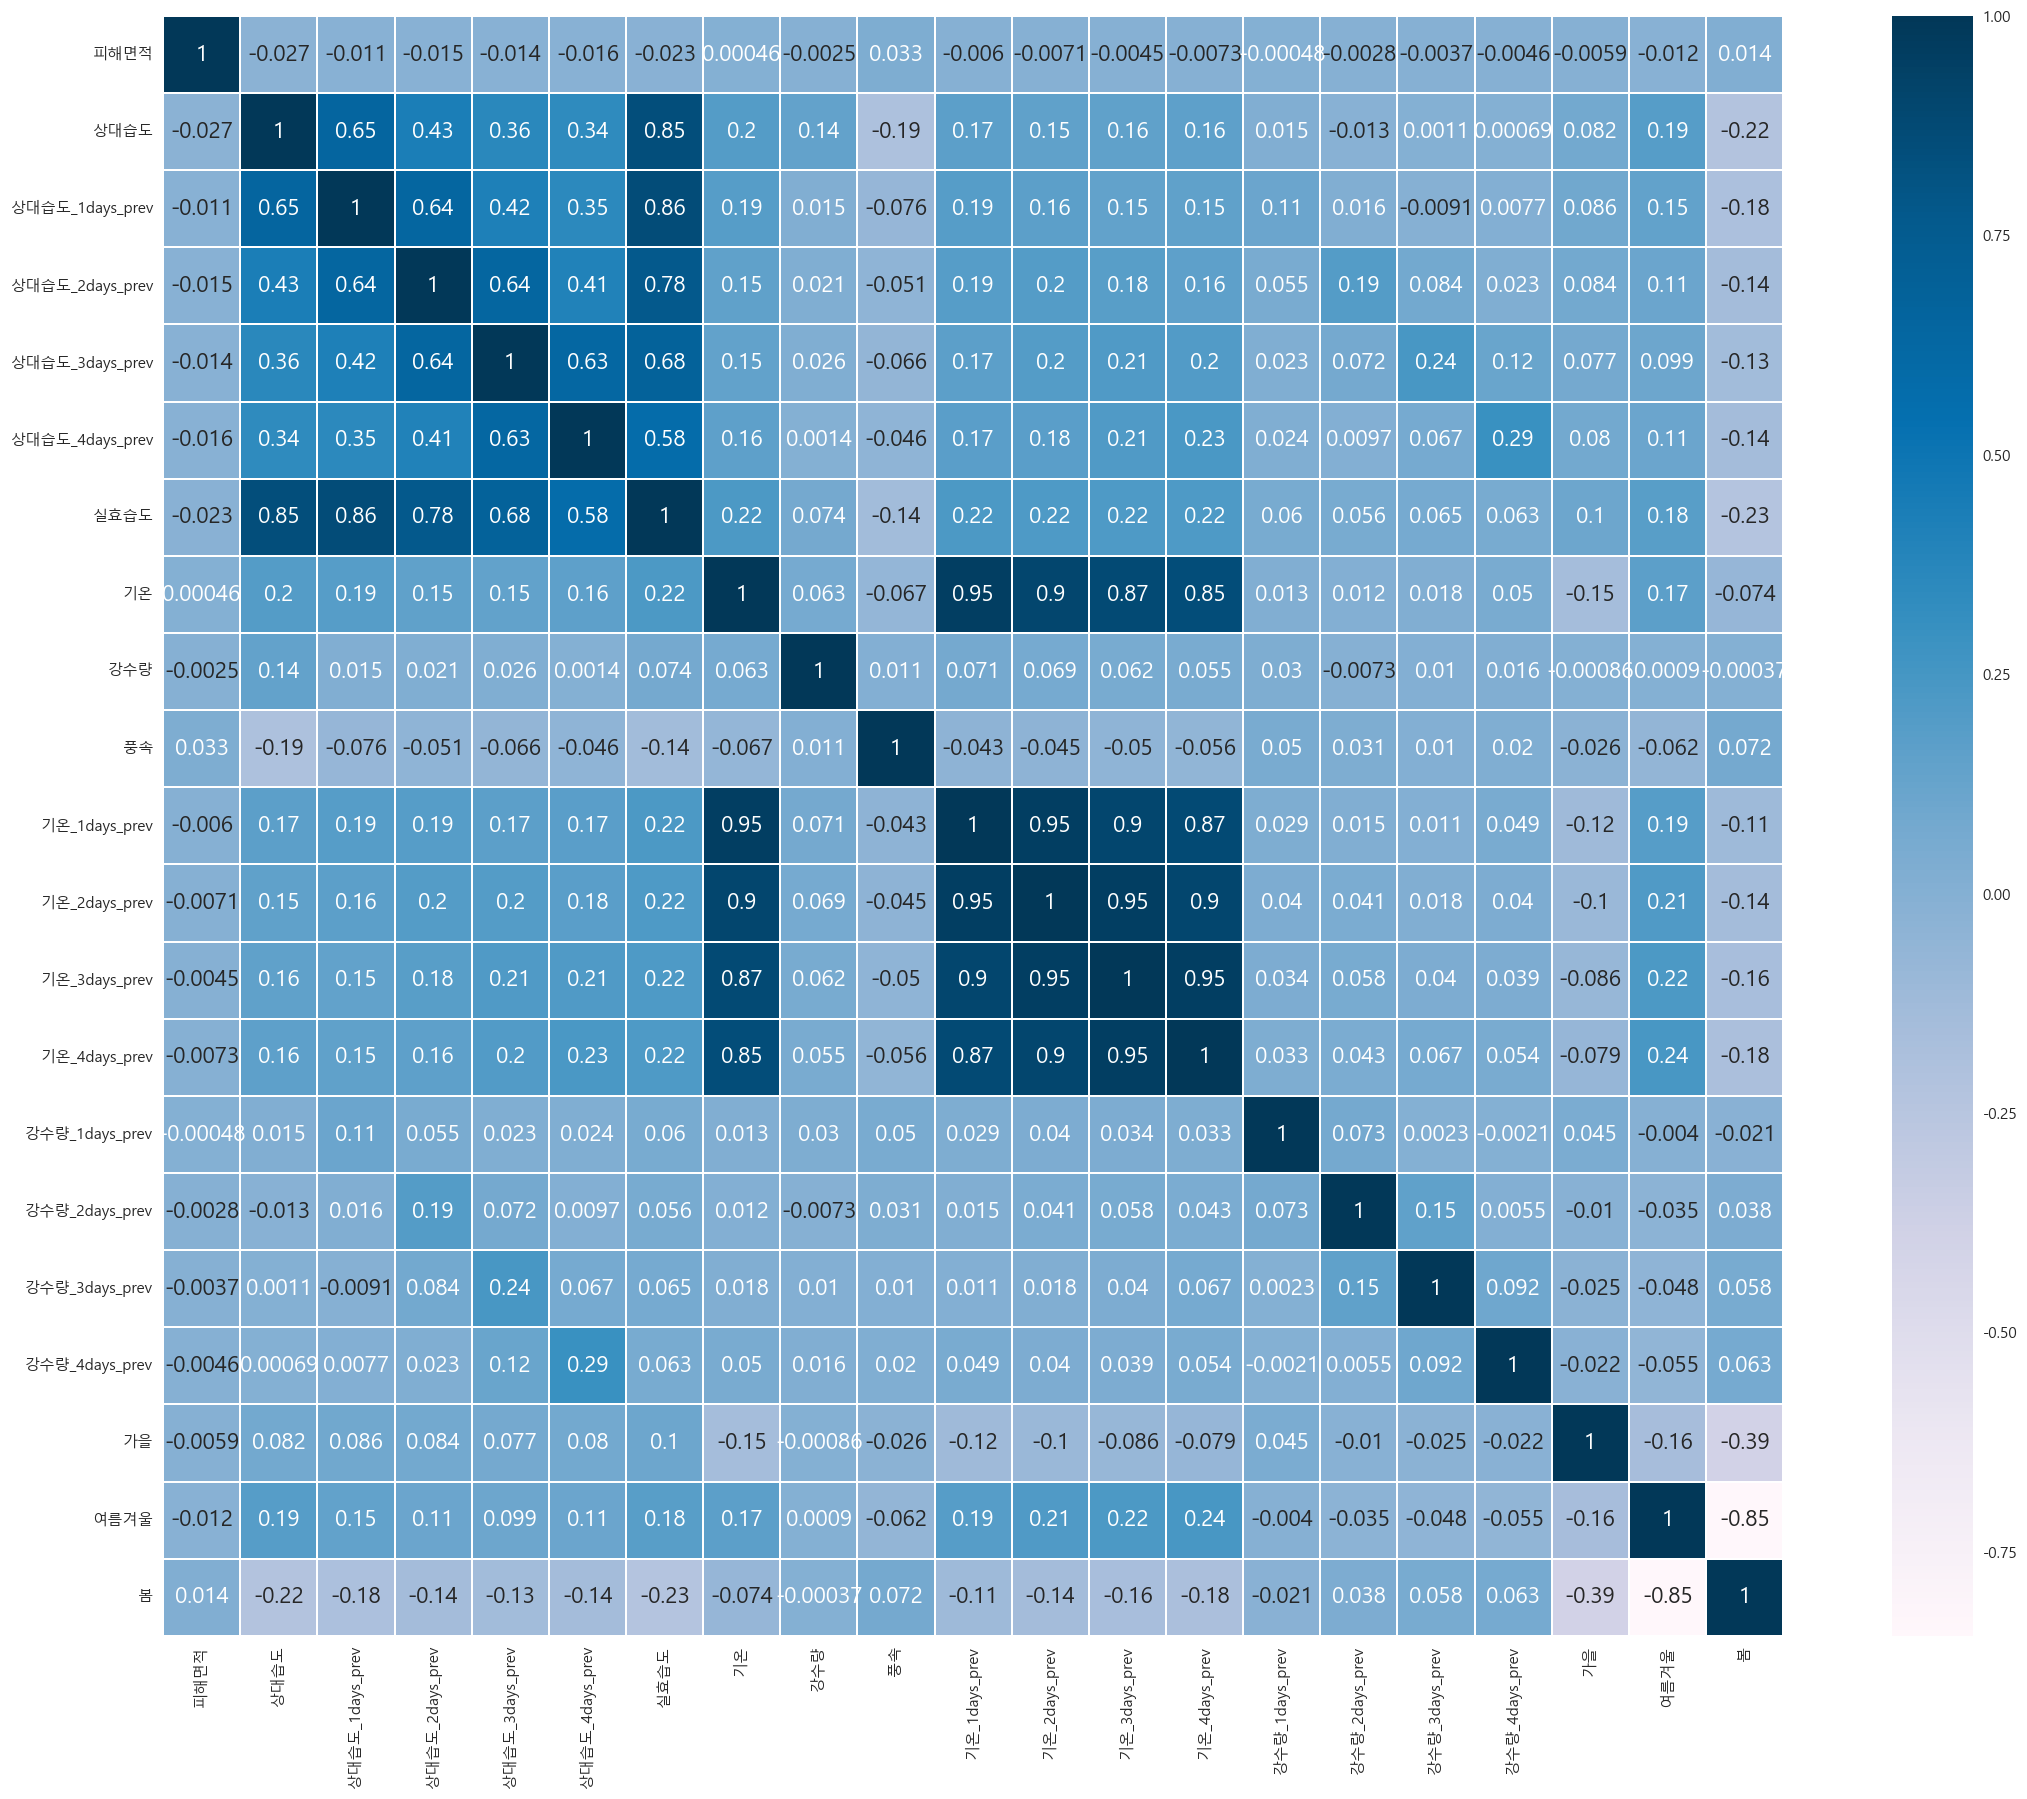

In [37]:
colormap = plt.cm.PuBu
plt.figure(figsize=(25, 20))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

DATA split

In [38]:
data.columns

Index(['피해면적', '상대습도', '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '가을', '여름겨울',
       '봄'],
      dtype='object')

In [39]:
# data.drop(['상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
#        '상대습도_4days_prev'],axis=1,inplace=True)

In [40]:
#data.drop(['봄','여름겨울','가을'],axis=1,inplace=True)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train=data

target = train['피해면적'][:len(train)]

print(train.shape,target.shape)

train.drop(['피해면적'],axis=1,inplace=True)

(10019, 21) (10019,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2,stratify=target,random_state=42) 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape )

(8015, 20) (2004, 20) (8015,) (2004,)


# RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1 = RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
prediction = model1.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.41367265469061876


In [45]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

Text(0.5, 7.222222222222195, 'Predicted Label')

Text(32.72222222222222, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

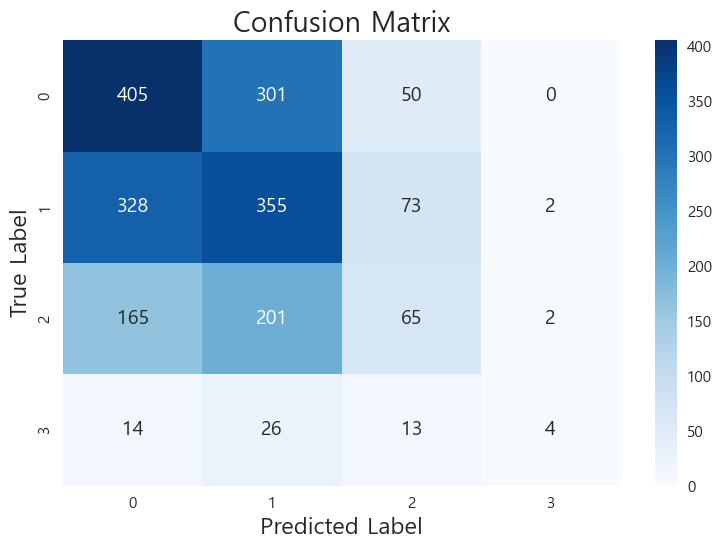

In [46]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.44407895 0.40203851 0.32338308 0.5       ]
Recall: [0.53571429 0.46833773 0.15011547 0.07017544]


In [48]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
f1

0.3946515656612662

<BarContainer object of 20 artists>

Text(0.5, 0, 'RF Feature Importance')

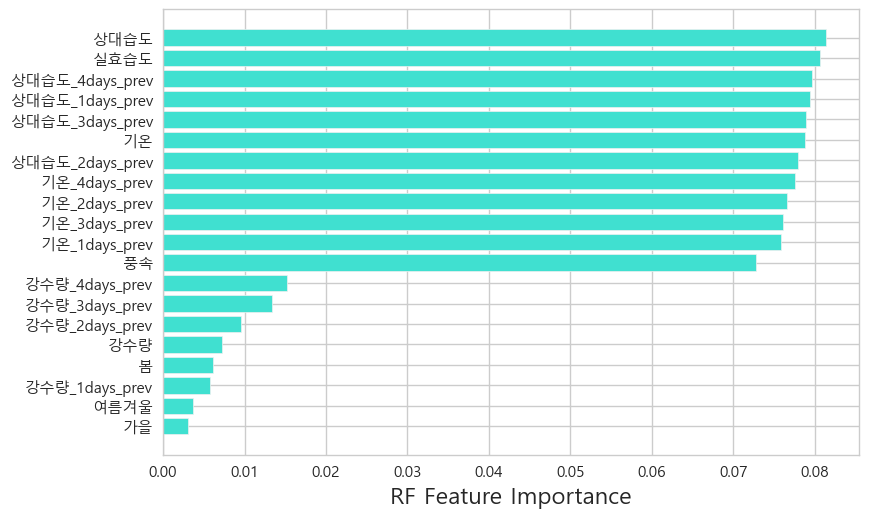

In [49]:
sorted_feature_importance = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model1.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("RF Feature Importance")

# CatBoost

In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 1.2525257	total: 145ms	remaining: 14.4s
1:	learn: 1.1949488	total: 152ms	remaining: 7.44s
2:	learn: 1.1661165	total: 156ms	remaining: 5.04s
3:	learn: 1.1501960	total: 160ms	remaining: 3.83s
4:	learn: 1.1411580	total: 163ms	remaining: 3.1s
5:	learn: 1.1354398	total: 167ms	remaining: 2.61s
6:	learn: 1.1277841	total: 171ms	remaining: 2.27s
7:	learn: 1.1236677	total: 176ms	remaining: 2.03s
8:	learn: 1.1191252	total: 180ms	remaining: 1.82s
9:	learn: 1.1148341	total: 184ms	remaining: 1.65s
10:	learn: 1.1109803	total: 188ms	remaining: 1.52s
11:	learn: 1.1079538	total: 192ms	remaining: 1.41s
12:	learn: 1.1059051	total: 196ms	remaining: 1.31s
13:	learn: 1.1011759	total: 199ms	remaining: 1.22s
14:	learn: 1.0976622	total: 203ms	remaining: 1.15s
15:	learn: 1.0930906	total: 207ms	remaining: 1.09s
16:	learn: 1.0910650	total: 212ms	remaining: 1.03s
17:	learn: 1.0855227	total: 216ms	remaining: 985ms
18:	learn: 1.0813899	total: 221ms	remaining: 941ms
19:	learn: 1.0780

In [51]:
prediction = model.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.4106786427145709


<BarContainer object of 20 artists>

Text(0.5, 0, 'CatBoost Feature Importance')

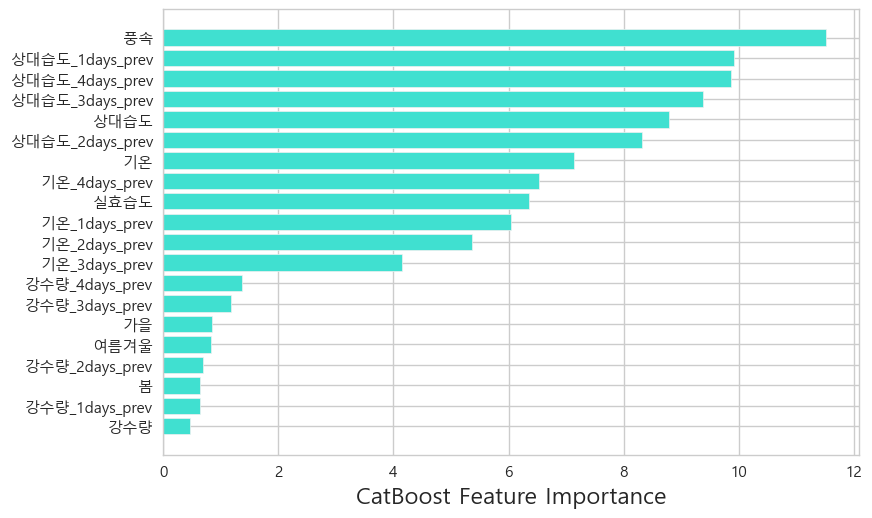

In [52]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [53]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
f1

0.39169679690616643

<AxesSubplot:>

Text(0.5, 7.222222222222195, 'Predicted Label')

Text(32.72222222222222, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

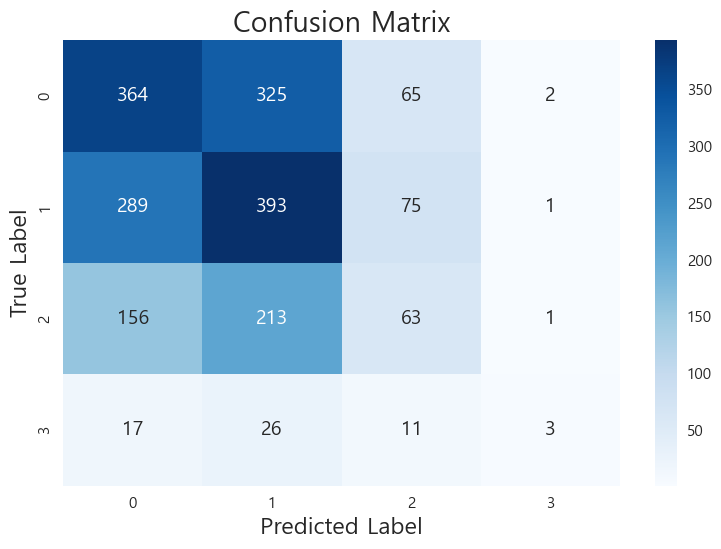

In [54]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [55]:
precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.44067797 0.41065831 0.29439252 0.42857143]
Recall: [0.48148148 0.51846966 0.14549654 0.05263158]


.

.